# Scaling and correlation
## Goals

- Scaling of the data with MinMaxScaler
- Performing the correlation
- exporting the scaled table

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [9]:
df = pd.read_csv('./data/merged_tables.csv', low_memory=False, index_col=0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4763230 entries, 0 to 4763229
Data columns (total 59 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Num_Acc                int64  
 1   an                     int64  
 2   mois                   int64  
 3   jour                   int64  
 4   hrmn                   object 
 5   lum                    int64  
 6   agg                    int64  
 7   int                    int64  
 8   atm                    float64
 9   col                    float64
 10  com                    object 
 11  adr                    object 
 12  gps                    object 
 13  lat                    float64
 14  long                   float64
 15  dep                    object 
 16  catr                   float64
 17  voie                   object 
 18  v1                     float64
 19  v2                     object 
 20  circ                   float64
 21  nbv                    float64
 22  vosp              

In [43]:
df.head()

,an,mois,jour,hrmn,lum,agg,int,atm,col,com,...,senc,catv,occutc,obs,obsm,choc,manv,num_veh_df4,id_vehicule_df4,motor
Num_Acc,,,,,,,,,,,,,,,,,,,,,
201400000001,14,5,7,2015,1,2,1,1.0,3.0,11,...,0.0,33,0.0,0.0,2.0,1.0,1.0,A01,NaN,NaN
201400000001,14,5,7,2015,1,2,1,1.0,3.0,11,...,0.0,7,0.0,0.0,0.0,6.0,15.0,B02,NaN,NaN
201400000001,14,5,7,2015,1,2,1,1.0,3.0,11,...,0.0,33,0.0,0.0,2.0,1.0,1.0,A01,NaN,NaN
201400000001,14,5,7,2015,1,2,1,1.0,3.0,11,...,0.0,7,0.0,0.0,0.0,6.0,15.0,B02,NaN,NaN
201400000002,14,5,31,430,1,2,1,1.0,6.0,11,...,0.0,7,0.0,1.0,0.0,7.0,13.0,A01,NaN,NaN


In [30]:
# Select the data for the correlation
columns = ['lum', 'col','atm','surf','int','catr','circ','vosp', 'prof', 'plan', 'infra','situ','catv','catu', 'grav',
          'trajet','secu', 'locp']
df_select = df[columns]
df_select.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4763230 entries, 201400000001 to 201300058397
Data columns (total 18 columns):
 #   Column  Dtype  
---  ------  -----  
 0   lum     int64  
 1   col     float64
 2   atm     float64
 3   surf    float64
 4   int     int64  
 5   catr    float64
 6   circ    float64
 7   vosp    float64
 8   prof    float64
 9   plan    float64
 10  infra   float64
 11  situ    float64
 12  catv    int64  
 13  catu    int64  
 14  grav    int64  
 15  trajet  float64
 16  secu    float64
 17  locp    float64
dtypes: float64(13), int64(5)
memory usage: 690.5 MB


In [41]:
# Scale the data
scaler = MinMaxScaler()
df_numeric_scaled = pd.DataFrame(scaler.fit_transform(df_select), columns=columns)
df_numeric_scaled.head()

,lum,col,atm,surf,int,catr,circ,vosp,prof,plan,infra,situ,catv,catu,grav,trajet,secu,locp
0,0.333333,0.500,0.2,0.2,0.2,0.25,0.6,0.25,0.4,0.4,0.1,0.222222,0.34,0.0,0.8,0.6,0.225806,0.1
1,0.333333,0.500,0.2,0.2,0.2,0.25,0.6,0.25,0.4,0.4,0.1,0.222222,0.08,0.0,0.8,0.6,0.225806,0.1
2,0.333333,0.500,0.2,0.2,0.2,0.25,0.6,0.25,0.4,0.4,0.1,0.222222,0.34,0.0,0.4,0.6,0.118280,0.1
3,0.333333,0.500,0.2,0.2,0.2,0.25,0.6,0.25,0.4,0.4,0.1,0.222222,0.08,0.0,0.4,0.6,0.118280,0.1
4,0.333333,0.875,0.2,0.2,0.2,0.25,0.6,0.25,0.4,0.6,0.1,0.555556,0.08,0.0,1.0,0.6,0.118280,0.1


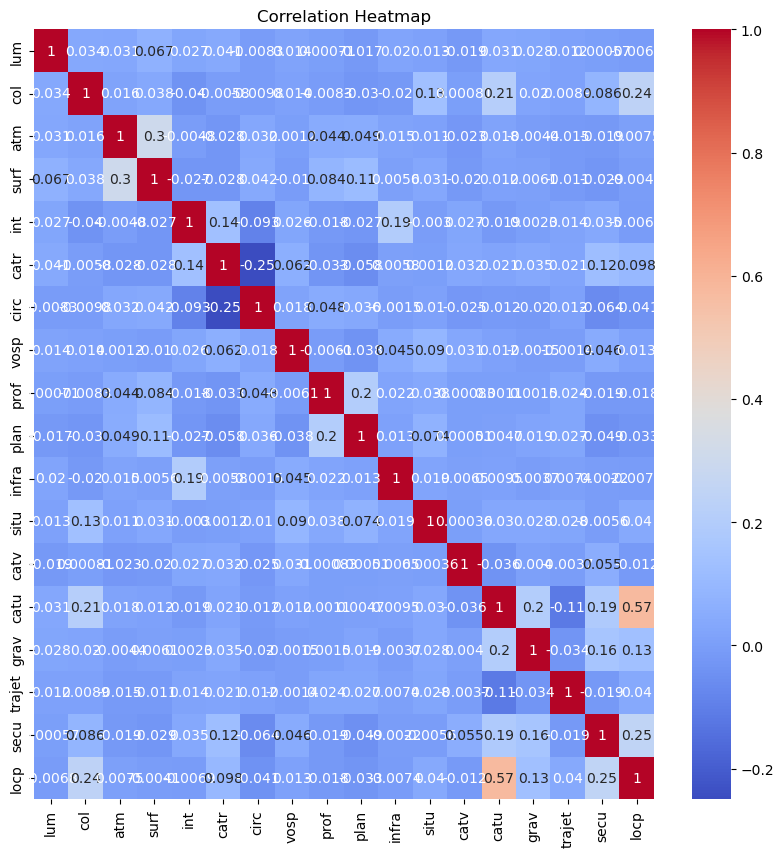

In [42]:
# Create a correlation matrix
correlation_matrix = df_numeric_scaled.corr()
plt.figure(figsize=(10, 10))
# Generate the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Add a title
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

- Scaling did not perform as expected
- Correlation is bad as before
- Try more parameters